In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def sigmoid(x):
  return 1.0/(1.0 + math.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

Text(0, 0.5, 'x2')

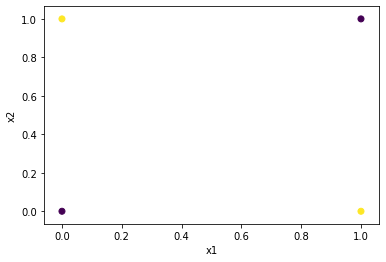

In [24]:
#Run this cell to use the perceptron to learn the exclusive or (X-OR) function
lr = 0.01
training_examples = 4
features = 2
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([0, 1, 1, 0])
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

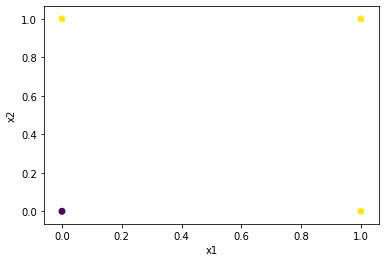

In [53]:
#Run this cell to use the perceptron to learn the OR function on two inputs
lr = 0.01
training_examples = 4
features = 2
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([0, 1, 1, 1])
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

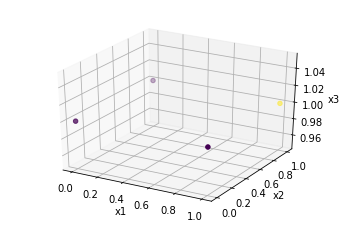

In [47]:
#Run this cell to use the perceptron to learn the function on three inputs
lr = 0.01
training_examples = 4
features = 3
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([0, 0, 0, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
ax.dist = 11
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

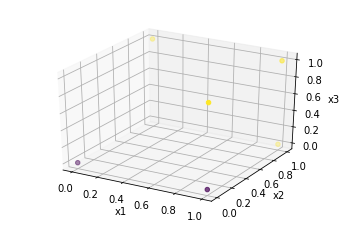

In [49]:
#Run this cell to use the perceptron to learn the another function on three inputs
lr = 0.01
training_examples = 6
features = 3
x = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 0, 1, 1, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
ax.dist = 11
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [0]:
class Perceptron(object):

  #constructor for the perceptron, initilizes member variables such as number of epochs
  def __init__(self, no_of_inputs,  learning_rate=0.01, epoch = 10, print_progress = True):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.print_progress = print_progress
        self.weights = np.array([1.1, -2.1, 0.3])

  #returns dot product of two vectors, in this case, weight_vector dot x_n, where x_n is the nth training example
  def dot(self, example, training_inputs):
    sum = 0.0
    for k in range(features):
      sum += self.weights[k] * training_inputs[example][k]
    return sum

  #returns the current predicted value of y given a training input x_n
  def predict(self, example, training_inputs):
    return round(sigmoid(self.dot(example, training_inputs)), 3)

  #training the perceptron based on the following algorithm:
  #for each epoch, for each training example update the perceptron weights based on the learning rate and update formula
  def train(self, training_inputs, labels):
    for i in range(self.epoch):
      for example in range(training_examples):
        dot_product = self.dot(example, training_inputs)
        for k in range(features):
          self.weights[k] -= lr*(sigmoid(dot_product) - y[example])*sigmoid_prime(dot_product)*training_inputs[example][k]
      
      #All the learning is done above! Code below is just for printing results
      if(self.print_progress):
        print("epoch: ", i, " weights: ", end = "")
        for w in range(self.weights.size):
          print(round(self.weights[w], 2)," ", end = "")
        print("predictions: ", end = "")
        for p in range(training_examples):
          print(self.predict(p, training_inputs), " ", end = "")
        print()

    print("Final predictions: ", end="")
    for p in range(training_examples):
      print(self.predict(p, training_inputs), " ", end = "")
      


In [54]:
p = Perceptron(features, 0.01, 10000, False)
p.train(x, y)

Final predictions: 0.5  0.935  0.913  0.993  